Import libraries
Program to identify who all survived in titanic crash

In [3]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

Copy Training data into t_train DataFrame and Test data into t_test DataFrame

In [4]:
t_train = pd.read_csv('train_1.csv')
print(t_train.head())
print(len(t_train.columns))
t_test = pd.read_csv('test_1.csv')
t_test.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
12

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Histogram plot of survived/Not Survived people in training data

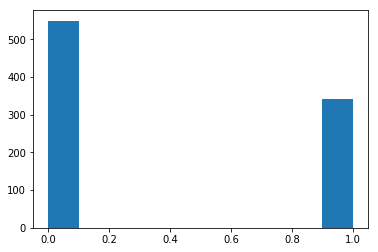

In [5]:
plt.hist(t_train['Survived'])
plt.show()

Tried plotting scatter plot between Fare and Survived People. Graph doesn't give very clear idea.

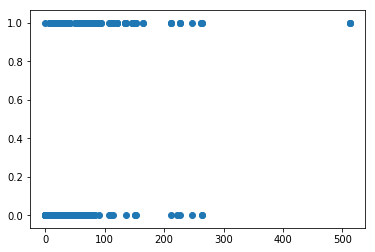

In [6]:
plt.scatter(t_train['Fare'],t_train['Survived'])
plt.show()

C:\Users\dholw\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


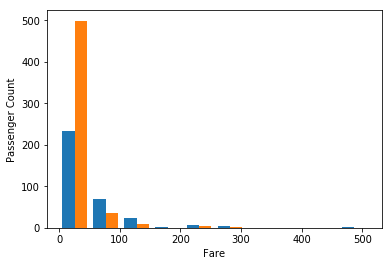

In [7]:
plt.hist([t_train[t_train['Survived']==1]['Fare'],t_train[t_train['Survived']==0]['Fare']],label=t_train['Survived'])
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.show()

Scatter plot between SibSp and survival. People with high number of sibling and spouses (more than 4) are less likely to survive

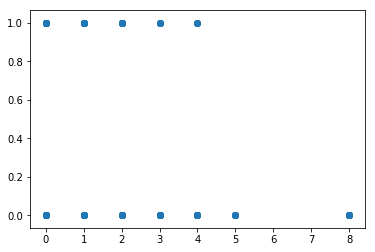

In [8]:
plt.scatter(t_train['SibSp'],t_train['Survived'])
plt.show()

Number of null values in Training and test data

In [9]:
print(t_train.isnull().sum())
print(t_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Analysis of Various features with Survived (output) to identify importance and impact of individual features

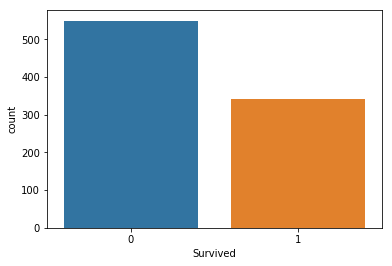

In [10]:
import seaborn as sns
sns.countplot('Survived',data = t_train)
plt.show()

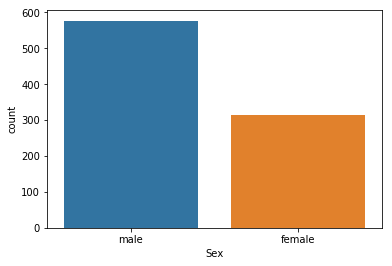

In [11]:
sns.countplot('Sex',data=t_train)
plt.show()

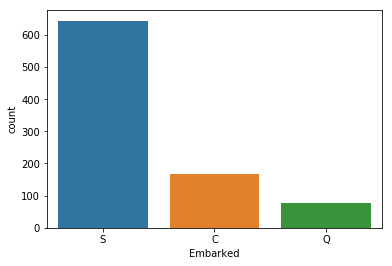

In [12]:
sns.countplot('Embarked',data=t_train)
plt.show()

In [13]:
t_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
t_train.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

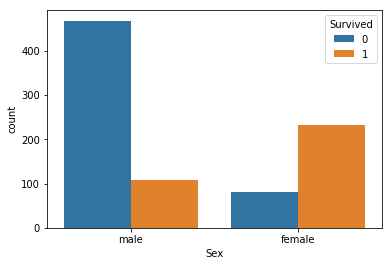

In [15]:
sns.countplot('Sex',hue='Survived',data=t_train)
plt.show()

In [16]:
pd.crosstab(t_train.Pclass,t_train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


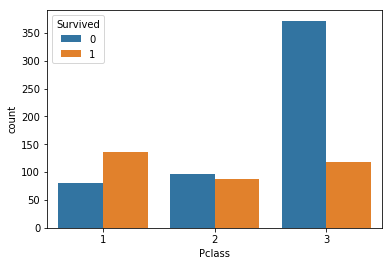

In [17]:
t_train['Pclass'].value_counts()
sns.countplot('Pclass',hue='Survived',data=t_train)
plt.show()

In [18]:
pd.crosstab([t_train.Sex,t_train.Survived],t_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

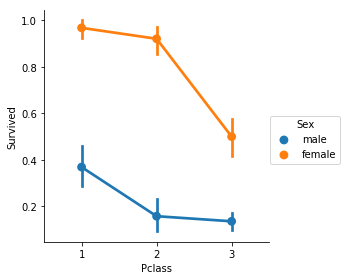

In [19]:
sns.factorplot('Pclass','Survived',hue='Sex',data=t_train)
plt.show()

Minimum age is 0.42 years (Few months old baby)

In [20]:
print(t_train['Age'].min())

0.42


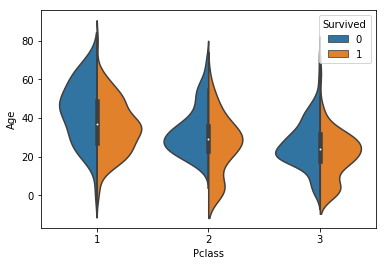

In [21]:
sns.violinplot("Pclass","Age", hue="Survived", data=t_train,split=True)
plt.show()

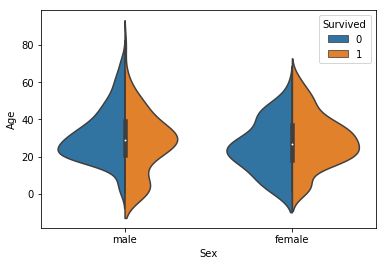

In [22]:
sns.violinplot("Sex","Age", hue="Survived", data=t_train,split=True)
plt.show()

# Doing the new Feature Creation after analyzing the name. Identifying Initials of people (Mr., Miss. , Mrs., etc.) 

In [23]:
t_train['Initial']=0
for i in t_train:
    t_train['Initial']=t_train.Name.str.extract('([A-Za-z]+)\.')
print(t_train['Initial'])  

t_test['Initial']=0
for i in t_test:
    t_test['Initial']=t_test.Name.str.extract('([A-Za-z]+)\.')
print(t_test['Initial'])  

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object
0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7     

C:\Users\dholw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dholw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [24]:
pd.crosstab(t_train.Initial,t_train.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
pd.crosstab(t_test.Initial,t_test.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


Correcting spellings of Initials and replacing less frequently occuring Initials with Mr., Miss, etc. logically

In [26]:
t_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Sir','Capt','Nobal','Nobal','Nobal','Capt','Sir','Capt','Sir','Nobal'],inplace=True)

In [27]:
t_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Sir','Capt','Nobal','Nobal','Nobal','Capt','Sir','Capt','Sir','Nobal','Nobal'],inplace=True)

Average age of Each initial people

In [28]:

t_test.groupby('Initial')['Age'].mean()
t_train.groupby('Initial')['Age'].mean()

Initial
Capt      56.600000
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Nobal     39.750000
Sir       43.076923
Name: Age, dtype: float64

Calculating missing age values based on Initials of a Person (example 'Master' refers to babies. There age should be less)

In [29]:
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Mr'),'Age']=33
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Mrs'),'Age']=36
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Master'),'Age']=5
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Miss'),'Age']=22
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Sir'),'Age']=43
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Nobal'),'Age']=40
t_train.loc[(t_train.Age.isnull())&(t_train.Initial=='Capt'),'Age']=57
t_train.Age.isnull().any()

False

In [30]:
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Mr'),'Age']=33
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Mrs'),'Age']=36
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Master'),'Age']=5
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Miss'),'Age']=22
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Sir'),'Age']=43
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Nobal'),'Age']=40
t_test.loc[(t_test.Age.isnull())&(t_test.Initial=='Capt'),'Age']=57
t_test.Age.isnull().any()

False

Some more analysis with newly created Feature "Initial" and chances of Survival based on Initials.

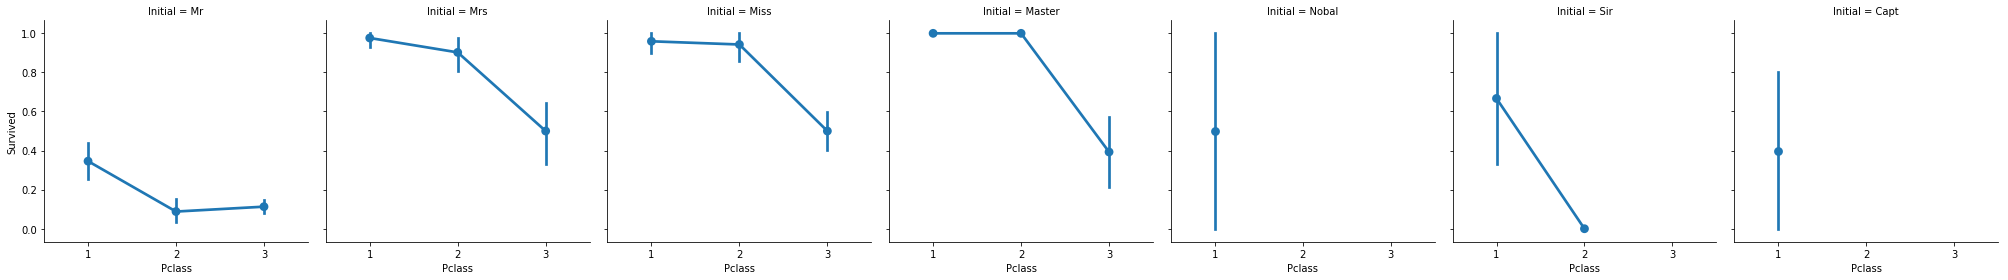

In [31]:
sns.factorplot('Pclass','Survived',col='Initial',data=t_train)
plt.show()

Analyzing Embarked feature with odd of Survival. People boarding from Station C have bettern chance of surviving followed by Q and S

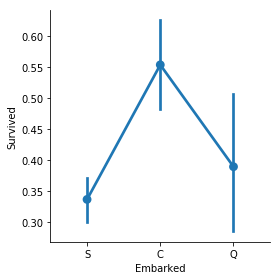

In [32]:
sns.factorplot('Embarked','Survived',data=t_train)
plt.show()

In [33]:
pd.crosstab([t_train['Embarked'],t_train['Survived']],t_train['Pclass'])

Pclass              1   2    3
Embarked Survived             
C        0         26   8   41
         1         59   9   25
Q        0          1   1   45
         1          1   2   27
S        0         53  88  286
         1         74  76   67

Filling Missing data with S (most people embarked from S station)

In [34]:
t_train['Embarked'].fillna('S',inplace=True)
t_train.Embarked.isnull().any()

False

Trying to find out Relation between No. of Sibiling/Spouse, class and chances of survival. Passengers in class 3 with 3 or more siblings/spouse has least chance of survival.

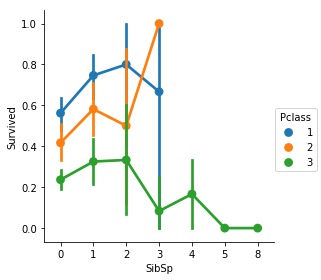

In [35]:
pd.crosstab([t_train.SibSp,t_train.Pclass],t_train.Survived)
sns.factorplot('SibSp','Survived',hue='Pclass',data=t_train)
plt.show()

Trying to find corelation between features. Looks like none of the features are redundant

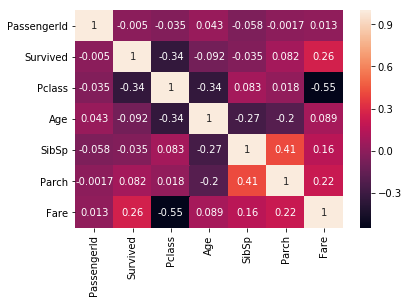

In [36]:
sns.heatmap(t_train.corr(),annot=True)
plt.show()

Dividing age into category by adding "Age_band" feature

In [37]:
t_train['Age_band']=0
t_train.loc[t_train['Age']<=16,'Age_band']=0
t_train.loc[(t_train['Age']>16)&(t_train['Age']<=32),'Age_band']=1
t_train.loc[(t_train['Age']>32)&(t_train['Age']<=48),'Age_band']=2
t_train.loc[(t_train['Age']>48)&(t_train['Age']<=64),'Age_band']=3
t_train.loc[t_train['Age']>64,'Age_band']=4
t_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [38]:
t_test['Age_band']=0
t_test.loc[t_test['Age']<=16,'Age_band']=0
t_test.loc[(t_test['Age']>16)&(t_test['Age']<=32),'Age_band']=1
t_test.loc[(t_test['Age']>32)&(t_test['Age']<=48),'Age_band']=2
t_test.loc[(t_test['Age']>48)&(t_test['Age']<=64),'Age_band']=3
t_test.loc[t_test['Age']>64,'Age_band']=4
t_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1


Number of people in different age bands and there chances of survival based on passenger class

In [39]:
t_train['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [40]:
#sns.factorplot('Age_band','Survived',hue='Pclass',data=t_train)
#plt.show()

Creating "FareRange/FareCat" feature similar to AgeBand

In [41]:
t_train['Fare_Range']=pd.qcut(t_train['Fare'],4)
t_test['Fare_Range']=pd.qcut(t_test['Fare'],4)
t_train.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


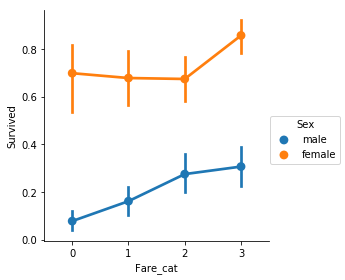

In [42]:
t_train['Fare_cat']=0
t_train.loc[t_train['Fare']<=7.91,'Fare_cat']=0
t_train.loc[(t_train['Fare']>7.91)&(t_train['Fare']<=14.454),'Fare_cat']=1
t_train.loc[(t_train['Fare']>14.454)&(t_train['Fare']<=31),'Fare_cat']=2
t_train.loc[(t_train['Fare']>31)&(t_train['Fare']<=513),'Fare_cat']=3
sns.factorplot('Fare_cat','Survived',data=t_train,hue='Sex')
plt.show()

In [43]:
t_test['Fare_cat']=0
t_test.loc[t_test['Fare']<=7.91,'Fare_cat']=0
t_test.loc[(t_test['Fare']>7.91)&(t_test['Fare']<=14.454),'Fare_cat']=1
t_test.loc[(t_test['Fare']>14.454)&(t_test['Fare']<=31),'Fare_cat']=2
t_test.loc[(t_test['Fare']>31)&(t_test['Fare']<=513),'Fare_cat']=3
#sns.factorplot('Fare_cat','Survived',data=t_train,hue='Sex')
#plt.show()

Converting Text features to numeric features

In [44]:
t_train.loc[(t_train['Sex']=='male'),'Sex']=0
t_train.loc[(t_train['Sex']=='female'),'Sex']=1
t_train=pd.get_dummies(t_train, columns=['Embarked','Initial','Pclass','Fare_cat'])
#t_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
#t_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [45]:
t_test.loc[(t_test['Sex']=='male'),'Sex']=0
t_test.loc[(t_test['Sex']=='female'),'Sex']=0
t_test=pd.get_dummies(t_test, columns=['Embarked','Initial','Pclass','Fare_cat'])
#t_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
#t_test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

drop unused features

In [46]:
t_train.head()
t_train.drop(['Name','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
t_test1 = t_test.drop(['Name','Ticket','Fare','Cabin','PassengerId'],axis=1)

As all features are converted to numeric. Find corelation heatmap between them

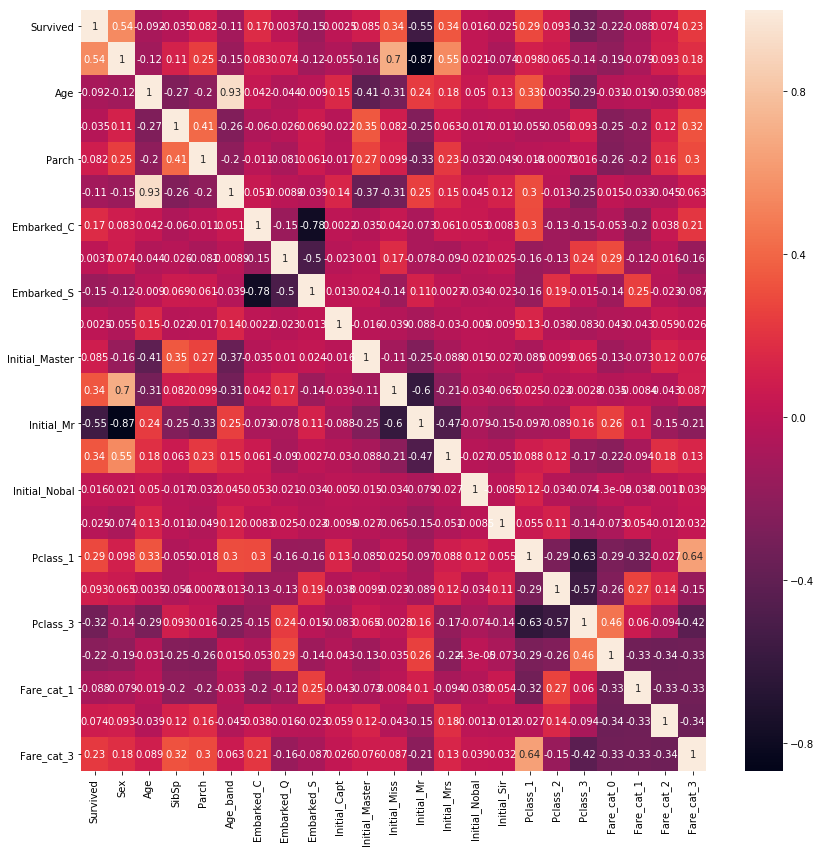

In [47]:
sns.heatmap(t_train.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

Split the training data into training and cross validation data (70:30 ratio)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
train,cv = train_test_split(t_train,test_size=0.3,random_state=3)

Separating labels(output) and input

In [49]:
train_y=train['Survived']
train_x = train.drop(['Survived','Fare_Range'],axis=1)
train_x.head()
t_test.head()
train_x.head()

,Sex,Age,SibSp,Parch,Age_band,Embarked_C,Embarked_Q,Embarked_S,Initial_Capt,Initial_Master,...,Initial_Mrs,Initial_Nobal,Initial_Sir,Pclass_1,Pclass_2,Pclass_3,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3
233,1,5.0,4,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
229,1,22.0,3,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
356,1,22.0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
439,0,31.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
637,0,31.0,1,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
cv_y=cv['Survived']
cv_x = cv.drop(['Survived','Fare_Range'],axis=1)
cv_x.head()

,Sex,Age,SibSp,Parch,Age_band,Embarked_C,Embarked_Q,Embarked_S,Initial_Capt,Initial_Master,...,Initial_Mrs,Initial_Nobal,Initial_Sir,Pclass_1,Pclass_2,Pclass_3,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3
395,0,22.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
85,1,33.0,3,0,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
201,0,33.0,8,2,2,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
542,1,11.0,4,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
702,1,18.0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [51]:
print(cv.shape)
print(train.shape)
print(t_test1.shape)
t_test1 = t_test1.drop(['Fare_Range'],axis=1)
t_test1.head()

(268, 24)
(623, 24)
(418, 23)


,Sex,Age,SibSp,Parch,Age_band,Embarked_C,Embarked_Q,Embarked_S,Initial_Capt,Initial_Master,...,Initial_Mrs,Initial_Nobal,Initial_Sir,Pclass_1,Pclass_2,Pclass_3,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3
0,0,34.5,0,0,2,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,47.0,1,0,2,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0,62.0,0,0,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,27.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,22.0,1,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


Checking the cross validation accuracy and tuining the hyperparameters 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [53]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
model = RandomForestClassifier(bootstrap= False, min_samples_leaf= 3, n_estimators= 50, 
                  min_samples_split= 10, max_features= 'sqrt', max_depth= 6)
model.fit(train_x, train_y)
print(train_x.columns)
print(t_test1.columns)

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Age_band', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Initial_Capt', 'Initial_Master', 'Initial_Miss',
       'Initial_Mr', 'Initial_Mrs', 'Initial_Nobal', 'Initial_Sir', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Fare_cat_0', 'Fare_cat_1', 'Fare_cat_2',
       'Fare_cat_3'],
      dtype='object')
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Age_band', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Initial_Capt', 'Initial_Master', 'Initial_Miss',
       'Initial_Mr', 'Initial_Mrs', 'Initial_Nobal', 'Initial_Sir', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Fare_cat_0', 'Fare_cat_1', 'Fare_cat_2',
       'Fare_cat_3'],
      dtype='object')


Generating output for test data. 

In [54]:
pred = model.predict(t_test1)
submission = pd.DataFrame({"PassengerId":t_test['PassengerId'],"Survived":pred})
submission.to_csv("titan_random_forest_result.csv",index=False)